In [1]:
# Data Cleaning
# Data Preprocessing
# Data Modeling
# Data Visulization

In [2]:
# Data Cleaning -- Impute NULL value, outliers, transform categorical /ordinal to numerical data
# when number of the varibales are very large, then we need more rows in the Dataset to prevent wide data.
##wide data. -- the number of variables 很多

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

kaggle = pd.read_csv('clean_kaggle_data.csv')
kaggle

/Users/ningcansun/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (207) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10724,20024,2104,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,Python,NaN,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN
10725,20029,5461,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
10726,20033,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10727,20034,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


In [6]:
# want to find the relationship betwee Salary & Education
## Q4 education, Q24 -- salary

# loc --- location -- 找你要锁定的data

## 逗号前面 是代表选了多少rows， 逗号后选了多少columns
## ：冒号是代表选取所有
## 只选取了Q4 和Q24这两列
# loc 用文字来表达
kaggle_Education = kaggle.loc[:,['Q4','Q24']]
kaggle_Education_group = kaggle_Education.groupby('Q4').describe()
kaggle_Education_group

Q24                \
                                                     count          mean   
Q4                                                                         
Bachelor’s degree                                   3013.0  35732.824427   
Doctoral degree                                     1718.0  68719.441211   
I prefer not to answer                               158.0  29689.873418   
Master’s degree                                     4879.0  52120.106579   
No formal education past high school                 106.0  31853.773585   
Professional degree                                  470.0  41892.553191   
Some college/university study without earning a...   385.0  40407.792208   

                                                                          \
                                                             std     min   
Q4                                                                         
Bachelor’s degree                                   60247.753546  1000.0   
Doctoral degree                                     85403.650394  1000.0   
I prefer not to answer                              72270.273148  1000.0   
Master’s degree                                     67681.571528  1000.0   
No formal education past high school                40999.243139  1000.0   
Professional degree                                 65761.341194  1000.0   
Some college/university study without earning a...  63403.294896  1000.0   

                                                                              \
                                                       25%      50%      75%   
Q4                                                                             
Bachelor’s degree                                   1000.0  10000.0  50000.0   
Doctoral degree                                     5000.0  40000.0  90000.0   
I prefer not to answer                              1000.0   3500.0  25000.0   
Master’s degree                                     4000.0  25000.0  70000.0   
No formal education past high school                1000.0  15000.0  50000.0   
Professional degree                                 2000.0  15000.0  50000.0   
Some college/university study without earning a...  1000.0  10000.0  50000.0   

                                                              
                                                         max  
Q4                                                            
Bachelor’s degree                                   500000.0  
Doctoral degree                                     500000.0  
I prefer not to answer                              500000.0  
Master’s degree                                     500000.0  
No formal education past high school                200000.0  
Professional degree                                 500000.0  
Some college/university study without earning a...  400000.0

Text(0.5, 1.0, 'Mean Salary for different people under different education')

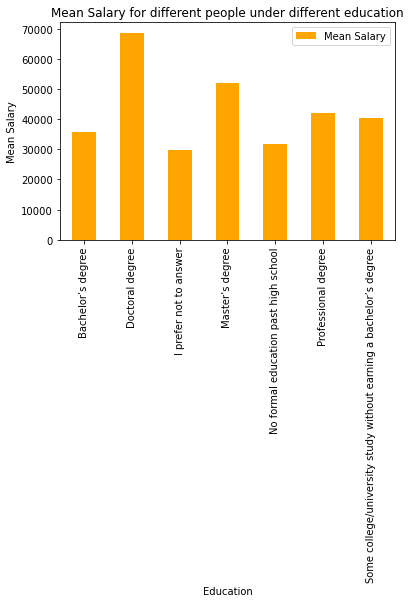

In [17]:
# iloc用数字来表达， 计算机里都是第一列为0， 第二列为1
kaggle_Education_group_meansalary = kaggle_Education_group.iloc[:,1].rename_axis('Education').reset_index(name ='Mean Salary')
salary = kaggle_Education_group_meansalary.iloc[:,1]
## plot.bar ----> draw a bar plot
kaggle_Education_group_meansalary.plot.bar(x='Education',color='Orange')
## 在y轴加一个介绍
plt.ylabel('Mean Salary')
#加一个title
plt.title('Mean Salary for different people under different education')




In [13]:
kaggle_Education_group_meansalary

,Education,Mean Salary
0,Bachelor’s degree,35732.824427
1,Doctoral degree,68719.441211
2,I prefer not to answer,29689.873418
3,Master’s degree,52120.106579
4,No formal education past high school,31853.773585
5,Professional degree,41892.553191
6,Some college/university study without earning ...,40407.792208


In [23]:
## Focus on the relationship between age & salary -- female
## Q1, Q2, Q24


# first to find out the gender is female
Woman = kaggle.loc[kaggle.Q2 =='Woman']
Woman
age_woman = Woman.loc[:,['Q1','Q24']]
age_woman_group = age_woman.groupby('Q1').describe()
age_woman_group

Q24                                                                  \
       count          mean           std     min      25%      50%       75%   
Q1                                                                             
18-21  103.0  14922.330097  59010.332980  1000.0   1000.0   1000.0    3500.0   
22-24  292.0  10219.178082  29622.653900  1000.0   1000.0   2000.0    7500.0   
25-29  416.0  28093.750000  48333.613332  1000.0   1000.0   7500.0   40000.0   
30-34  299.0  43132.107023  56579.027459  1000.0   3000.0  20000.0   60000.0   
35-39  234.0  49126.068376  74473.143213  1000.0   2000.0  20000.0   70000.0   
40-44  147.0  57914.965986  67759.909909  1000.0   4000.0  40000.0   80000.0   
45-49   82.0  62993.902439  69169.789930  1000.0   3000.0  40000.0  100000.0   
50-54   61.0  52114.754098  60292.923399  1000.0   2000.0  25000.0   90000.0   
55-59   25.0  88560.000000  80758.425773  1000.0  25000.0  70000.0  125000.0   
60-69   22.0  73454.545455  73938.666521  1000.0  16250.0  55000.0  100000.0   
70+      2.0   1000.000000      0.000000  1000.0   1000.0   1000.0    1000.0   

                 
            max  
Q1               
18-21  500000.0  
22-24  400000.0  
25-29  500000.0  
30-34  500000.0  
35-39  500000.0  
40-44  400000.0  
45-49  300000.0  
50-54  200000.0  
55-59  300000.0  
60-69  250000.0  
70+      1000.0

In [25]:
Man = kaggle.loc[kaggle.Q2=='Man']
age_man = Man.loc[:,['Q1','Q24']]
age_man_group = age_man.groupby('Q1').describe()
age_man_group

Q24                                                                  \
        count          mean           std     min      25%      50%       75%   
Q1                                                                              
18-21   382.0  13947.643979  54210.655336  1000.0   1000.0   1000.0    5000.0   
22-24  1109.0  18417.944094  48526.589653  1000.0   1000.0   4000.0   15000.0   
25-29  1897.0  30605.166052  47416.536540  1000.0   2000.0  15000.0   40000.0   
30-34  1648.0  51617.415049  62833.982111  1000.0   5000.0  30000.0   72500.0   
35-39  1210.0  60853.305785  69042.699126  1000.0   7500.0  40000.0   90000.0   
40-44   881.0  74068.671964  85187.330973  1000.0  15000.0  50000.0  100000.0   
45-49   674.0  75640.207715  82421.631925  1000.0  15000.0  60000.0  125000.0   
50-54   468.0  89711.538462  88448.778505  1000.0  20000.0  70000.0  125000.0   
55-59   267.0  88777.153558  89877.914075  1000.0  20000.0  70000.0  125000.0   
60-69   286.0  77244.755245  77124.105207  1000.0  10000.0  60000.0  125000.0   
70+      50.0  74670.000000  89740.647287  1000.0   1000.0  40000.0  125000.0   

                 
            max  
Q1               
18-21  500000.0  
22-24  500000.0  
25-29  500000.0  
30-34  500000.0  
35-39  500000.0  
40-44  500000.0  
45-49  500000.0  
50-54  500000.0  
55-59  500000.0  
60-69  400000.0  
70+    300000.0

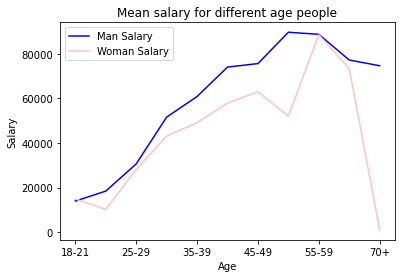

In [31]:
age_man_group.iloc[:,1].plot(color='Blue')
age_woman_group.iloc[:,1].plot(color='Pink')

plt.ylabel('Salary')
plt.title('Mean salary for different age people')
plt.xlabel('Age')
## add a legend
plt.legend(['Man Salary','Woman Salary'])

In [35]:
##country & salary for female
Woman = kaggle.loc[kaggle.Q2=='Woman']
country = Woman.loc[:,['Q3','Q24']]
country_group = country.groupby('Q3').describe()
country_group

Q24                 \
                                                    count           mean   
Q3                                                                         
Argentina                                            12.0   13416.666667   
Australia                                            11.0   96227.272727   
Bangladesh                                            3.0    1666.666667   
Belarus                                               5.0   18400.000000   
Belgium                                               5.0   34400.000000   
Brazil                                               49.0   10377.551020   
Canada                                               40.0   70362.500000   
Chile                                                 7.0   15571.428571   
China                                                13.0   66230.769231   
Colombia                                             11.0    3318.181818   
Egypt                                                20.0    4275.000000   
France                                               30.0   34233.333333   
Germany                                              33.0   60090.909091   
Ghana                                                 4.0    4000.000000   
Greece                                                8.0   32000.000000   
India                                               433.0    8566.974596   
Indonesia                                            33.0    6606.060606   
Iran, Islamic Republic of...                         19.0    8315.789474   
Ireland                                              13.0   41384.615385   
Israel                                                7.0   48285.714286   
Italy                                                21.0   32333.333333   
Japan                                                20.0   50875.000000   
Kenya                                                10.0    3900.000000   
Malaysia                                             18.0   18111.111111   
Mexico                                               14.0   18035.714286   
Morocco                                              10.0    4750.000000   
Nepal                                                 1.0    1000.000000   
Netherlands                                          17.0   75000.000000   
Nigeria                                              41.0   14475.609756   
Other                                               109.0   23798.165138   
Pakistan                                             20.0    4725.000000   
Peru                                                 10.0   14300.000000   
Philippines                                          13.0    9730.769231   
Poland                                               12.0   17750.000000   
Portugal                                             22.0   38045.454545   
Republic of Korea                                     2.0   11250.000000   
Romania                                               7.0   10571.428571   
Russia                                               37.0   16783.783784   
Saudi Arabia                                          9.0   15222.222222   
Singapore                                            15.0   47100.000000   
South Africa                                         11.0   15090.909091   
South Korea                                          13.0   25000.000000   
Spain                                                29.0   23172.413793   
Sri Lanka                                            10.0    1300.000000   
Sweden                                                8.0   52812.500000   
Switzerland                                           8.0  129375.000000   
Taiwan                                               15.0   32333.333333   
Thailand                                             13.0    7692.307692   
Tunisia                                              21.0    7261.904762   
Turkey                                               24.0    7416.666667   
Ukraine                   

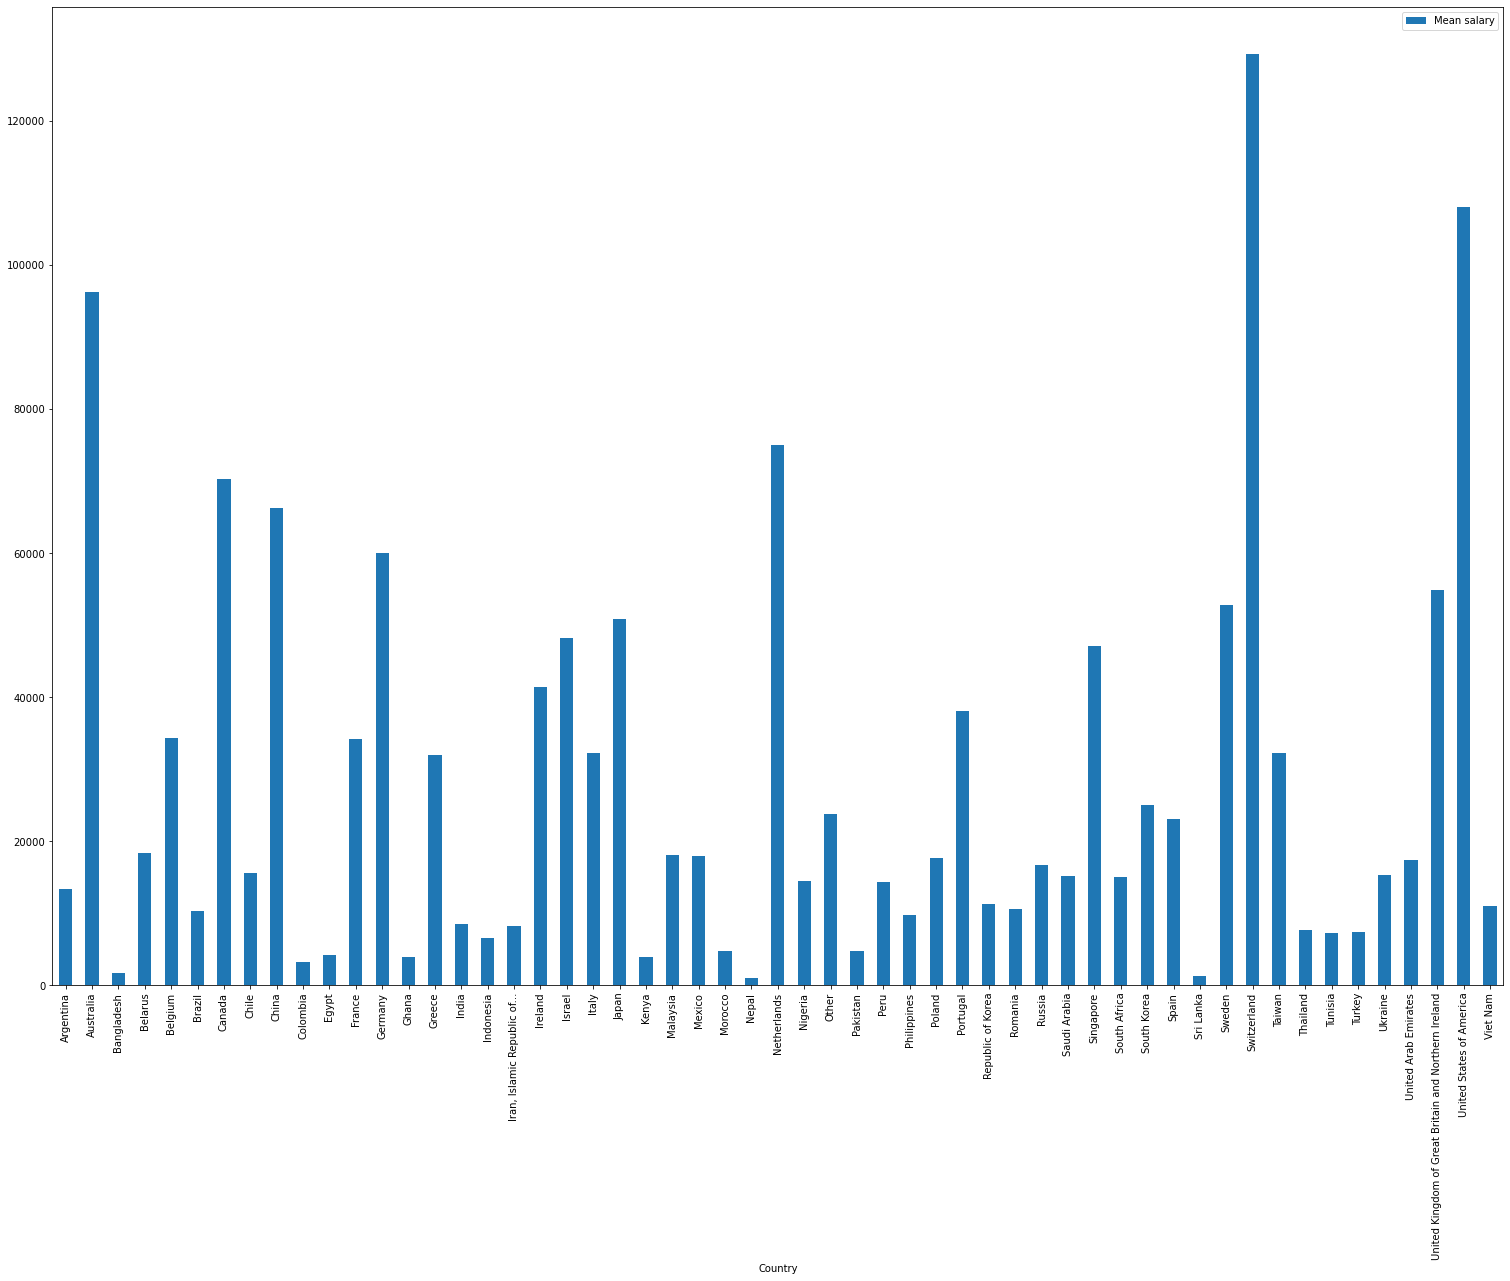

In [45]:
country_group_mean = country_group.iloc[:,1].rename_axis('Country').reset_index(name='Mean salary')
salary = country_group_mean.iloc[:,1]
country_group_mean.plot.bar(x='Country')
plt.rcParams['figure.figsize']=(26, 18)

In [49]:
Man_2a = kaggle.loc[kaggle.Q2=='Man']
salary_man_2a = Man_2a.loc[:,['Q2','Q24']]

Woman_2a = kaggle.loc[kaggle.Q2=='Woman']
salary_woman_2a = Woman_2a.loc[:,['Q2','Q24']]

In [51]:
## t test -- null hypothesis -- > 两组是相同的
## alternative --》 2 groups has difference
from scipy import stats
stats.ttest_ind(salary_man_2a['Q24'],salary_woman_2a['Q24'],equal_var = False)
## pvalue <0.05, so we need to reject null hypothesis -- > so we can conclude they are differrent

Ttest_indResult(statistic=8.792916020018406, pvalue=2.5655984594105773e-18)

In [56]:
# bootstrap
## seaborn -- > visulization
import seaborn as sns
import random
male = kaggle.loc[kaggle.Q2 =='Man']['Q24']
female = kaggle.loc[kaggle.Q2 =='Woman']['Q24']

def boot(sample):
    salary_series = random.choices(sample,k=len(sample))
    array_mean = np.array(salary_series).mean()
    return array_mean

men_bootstrap = []
for i in range (1000):
    x=boot(male.tolist())
    men_bootstrap.append(x)
    
women_bootstrap = []
for i in range(1000):
    x= boot(female.tolist())
    women_bootstrap.append(x)
    


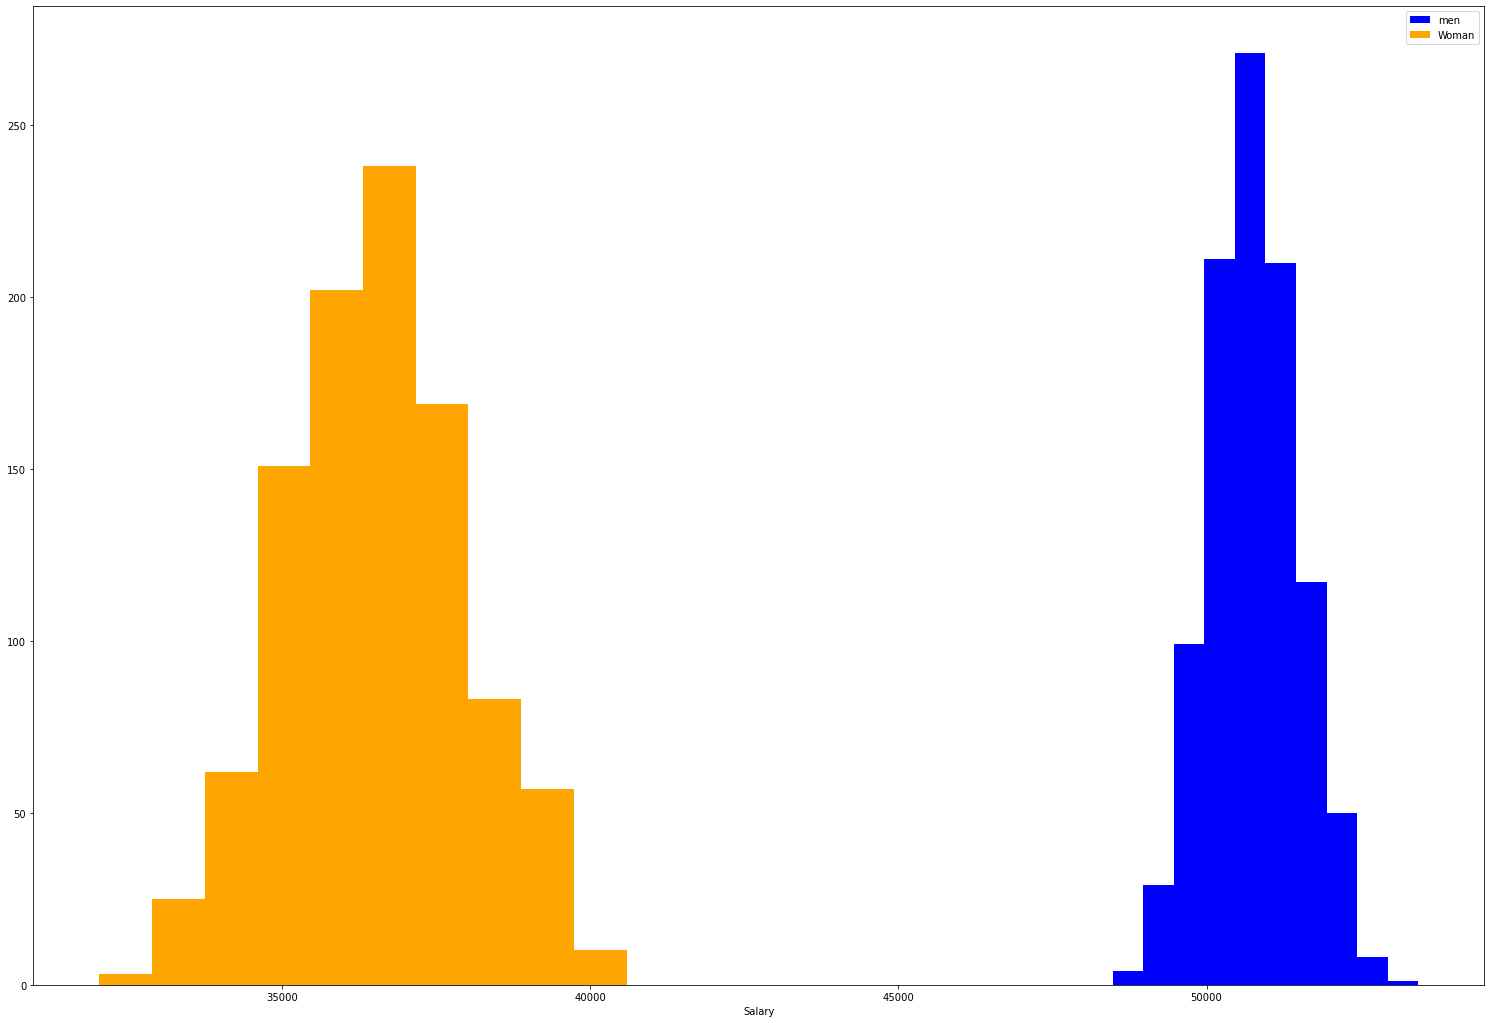

In [60]:
#women_bootstrap
plt.hist(men_bootstrap, color = 'Blue')

plt.hist(women_bootstrap, color = 'orange')
plt.xlabel('Salary')
plt.legend(labels =['men','Woman'])

In [62]:
stats.ttest_ind(men_bootstrap,women_bootstrap,equal_var = False)

Ttest_indResult(statistic=275.721638621938, pvalue=0.0)

In [69]:
Bachelor_boot = kaggle.loc[kaggle.Q4=='Bachelor’s degree']['Q24']
Master_boot = kaggle.loc[kaggle.Q4=='Master’s degree']['Q24']
Doctoral_boot = kaggle.loc[kaggle.Q4=='Doctoral degree']['Q24']

def education_boot(sample_education):
    salary_series_education = random.choices(sample_education,k=len(sample_education))
    array_mean_education = np.array(salary_series_education).mean()
    return array_mean_education
Bachelor_bootstrap = []
for i in range(1000):
    x=education_boot(Bachelor_boot.tolist())
    Bachelor_bootstrap.append(x)
Master_bootstrap=[]
for i in range(1000):
    x=education_boot(Master_boot.tolist())
    Master_bootstrap.append(x)
Doctoral_bootstrap=[]
for i in range(1000):
    x=education_boot(Doctoral_boot.tolist())
    Doctoral_bootstrap.append(x)
    

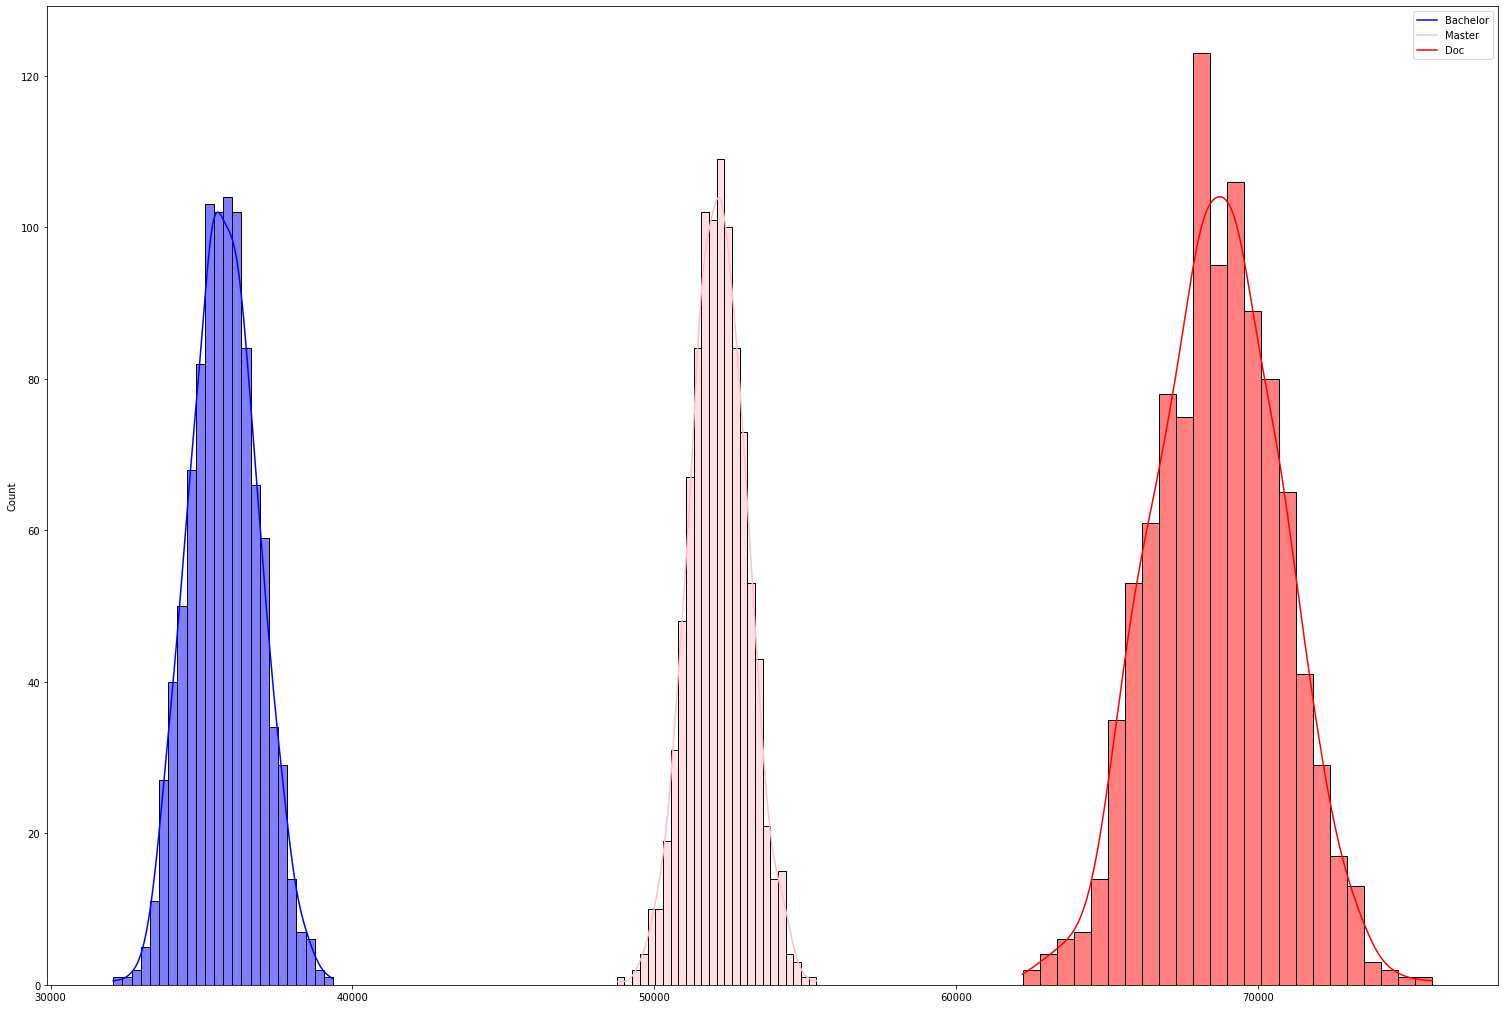

In [76]:
sns.histplot(data=Bachelor_bootstrap, kde = True, color ="Blue")
sns.histplot(data=Master_bootstrap, kde = True, color ="pink")
sns.histplot(data=Doctoral_bootstrap, kde = True, color ="red")
plt.legend(labels=['Bachelor','Master','Doc'])

In [79]:
f_value,p_value = stats.f_oneway(Bachelor_bootstrap,Master_bootstrap,Doctoral_bootstrap)
p_value

0.0